# Mini Competition: Richter's Predictor

Import modules and data

In [1]:
# install from requirements
!pip install -r requirements_petr.txt

In [2]:
# Modules
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Import scripts
import helper_functions_petr # various helper functions
import lgb_optimized_petr # 

In [4]:
# Load data
X, y, X_test = helper_functions_petr.imports()

Data Analysis

Data Cleaning

In [5]:
#First cleaning (before split - if required)

In [6]:
y = y['damage_grade']

In [7]:
# Split data in training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#More cleaning (after split)

Visualization

<Axes: title={'center': 'Feature Correlation Heatmap'}>

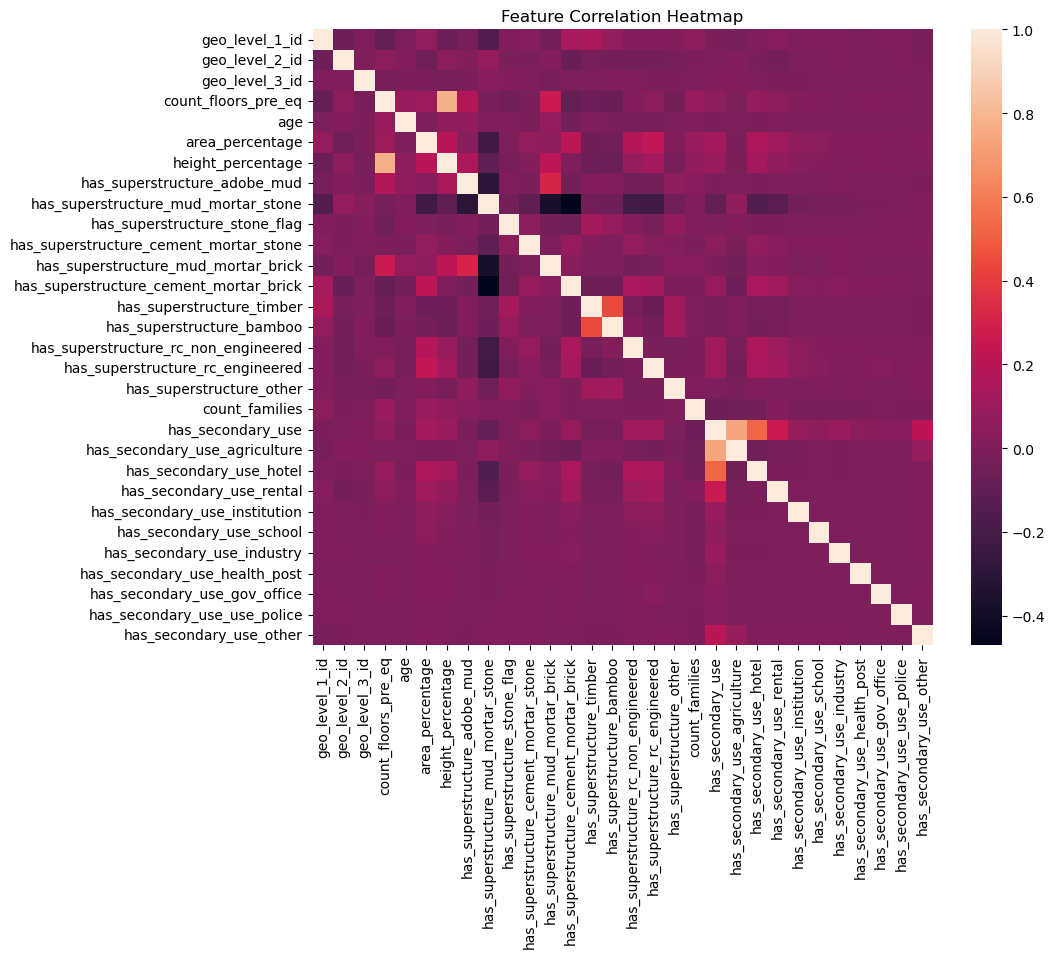

In [10]:
# correlation heatmap of predictors
corr = X.select_dtypes(include=[np.number]).drop('building_id', axis=1).corr()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title("Feature Correlation Heatmap")
sns.heatmap(corr, ax=ax)

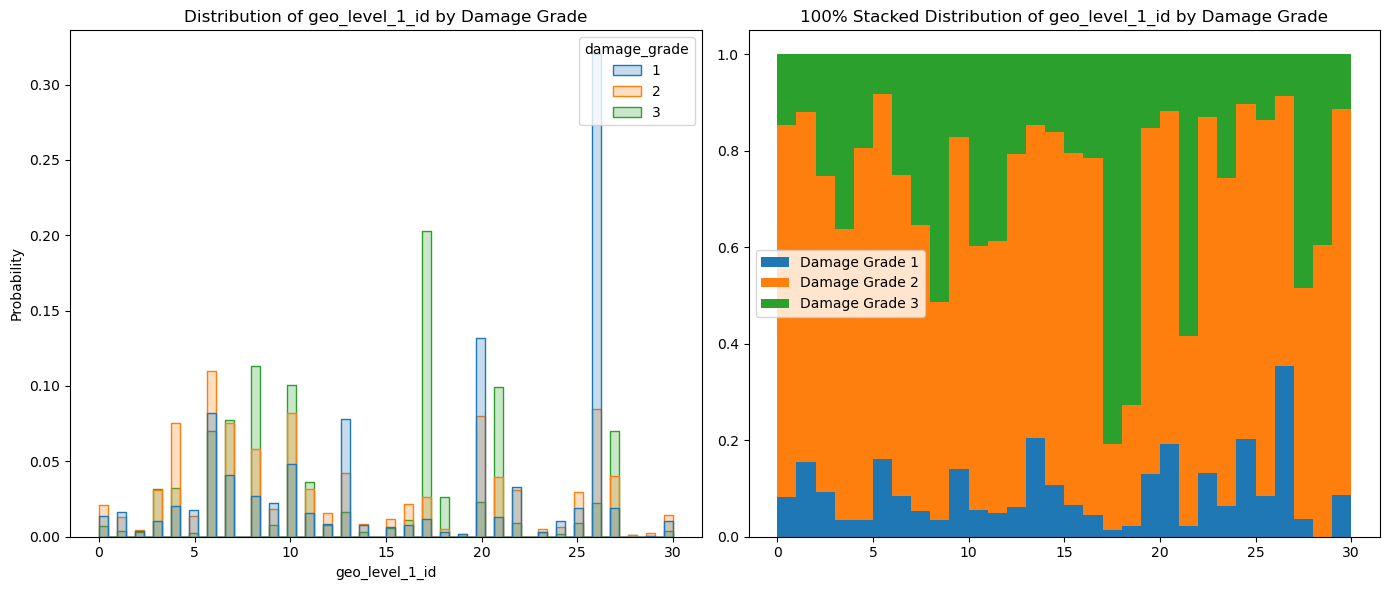

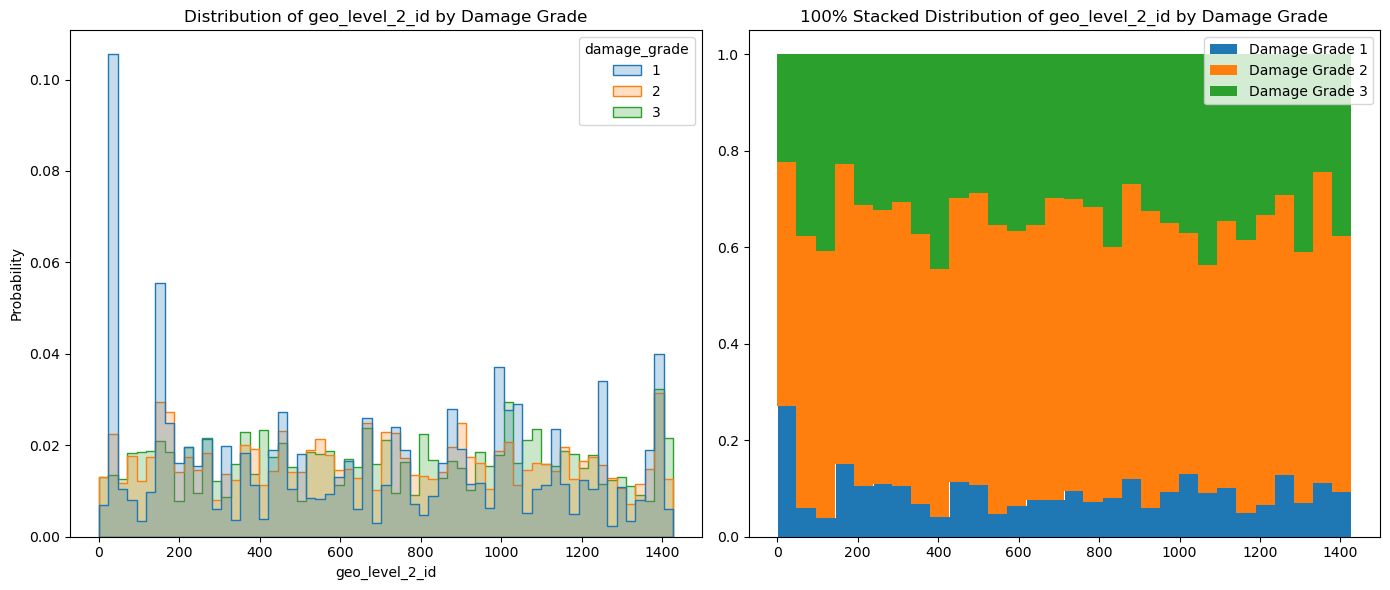

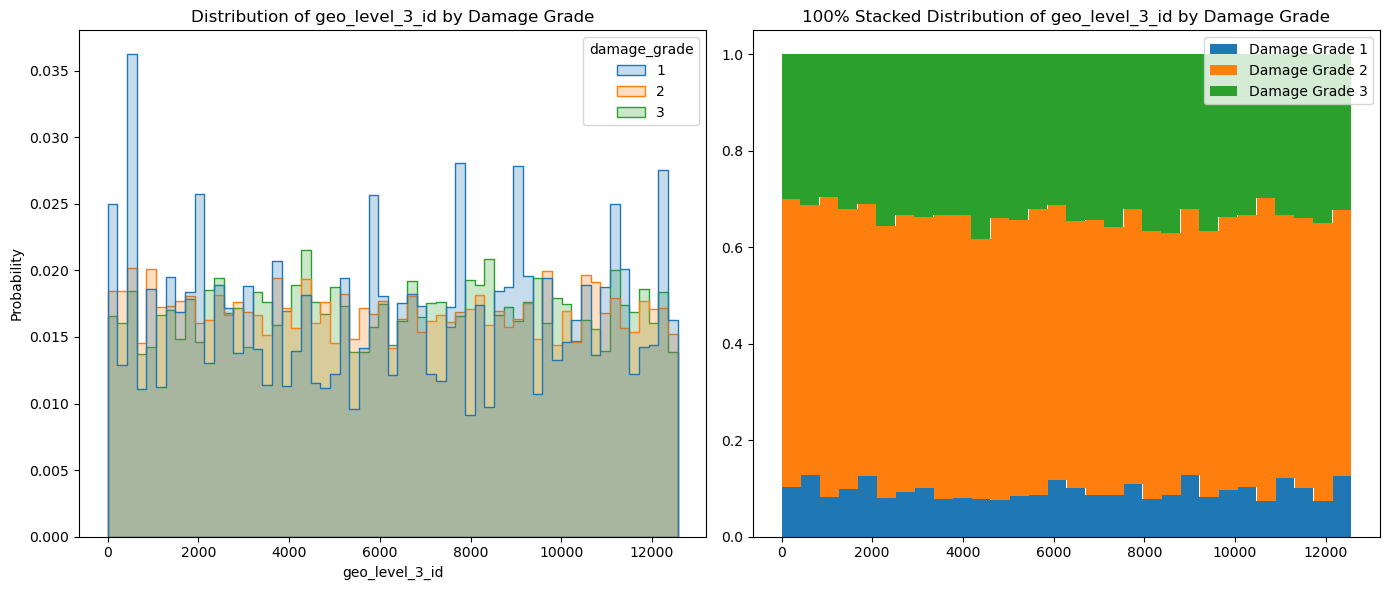

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


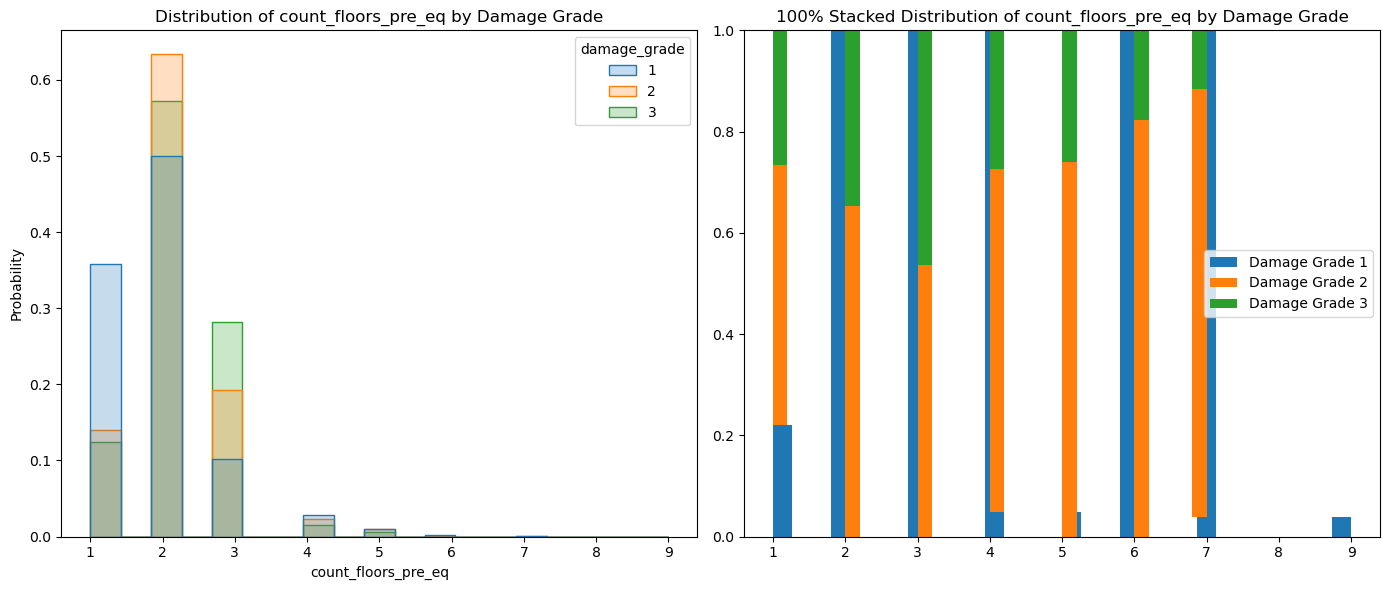

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


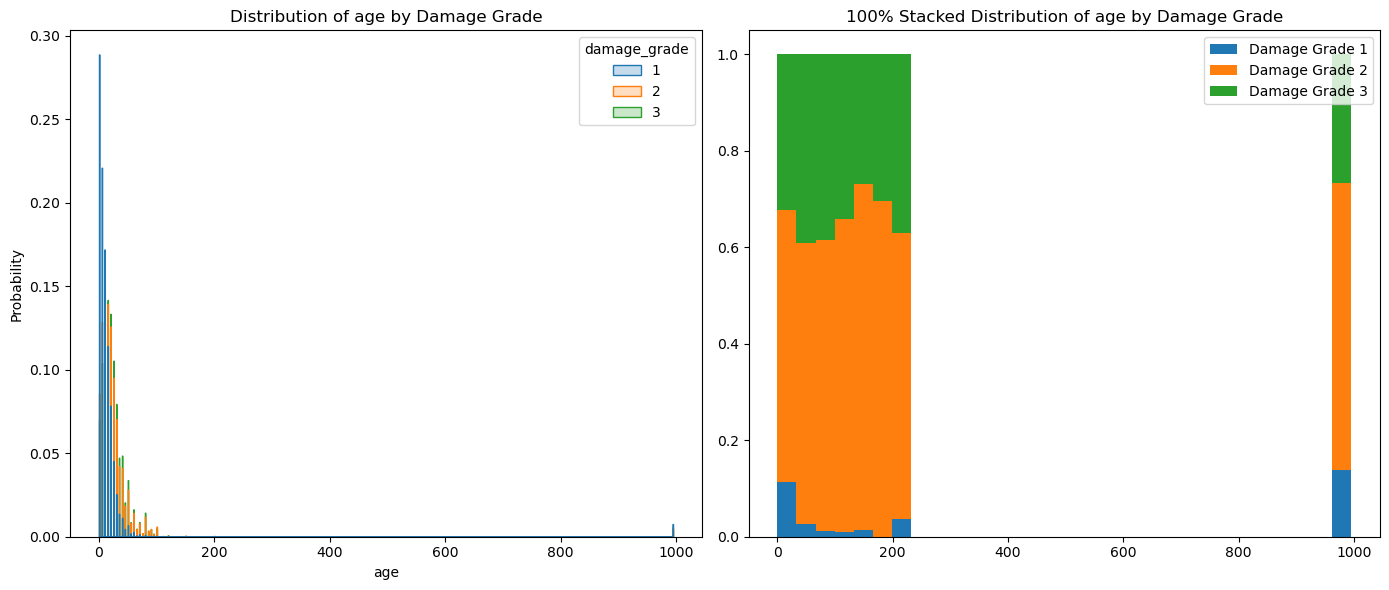

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


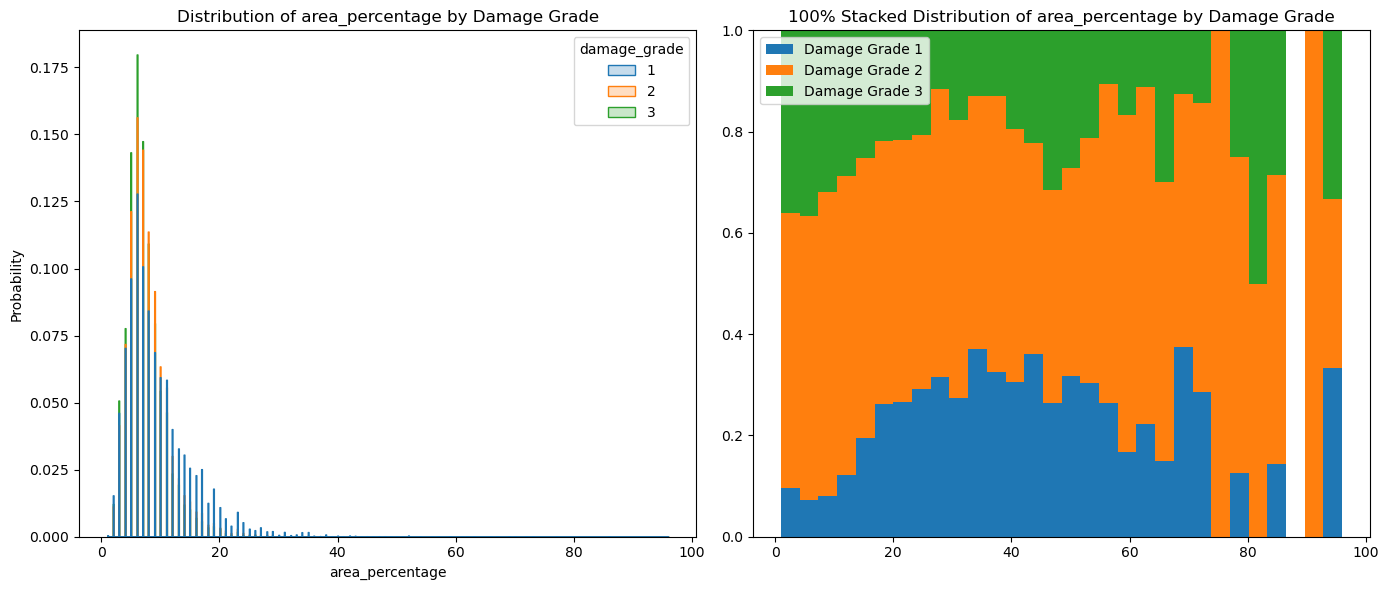

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


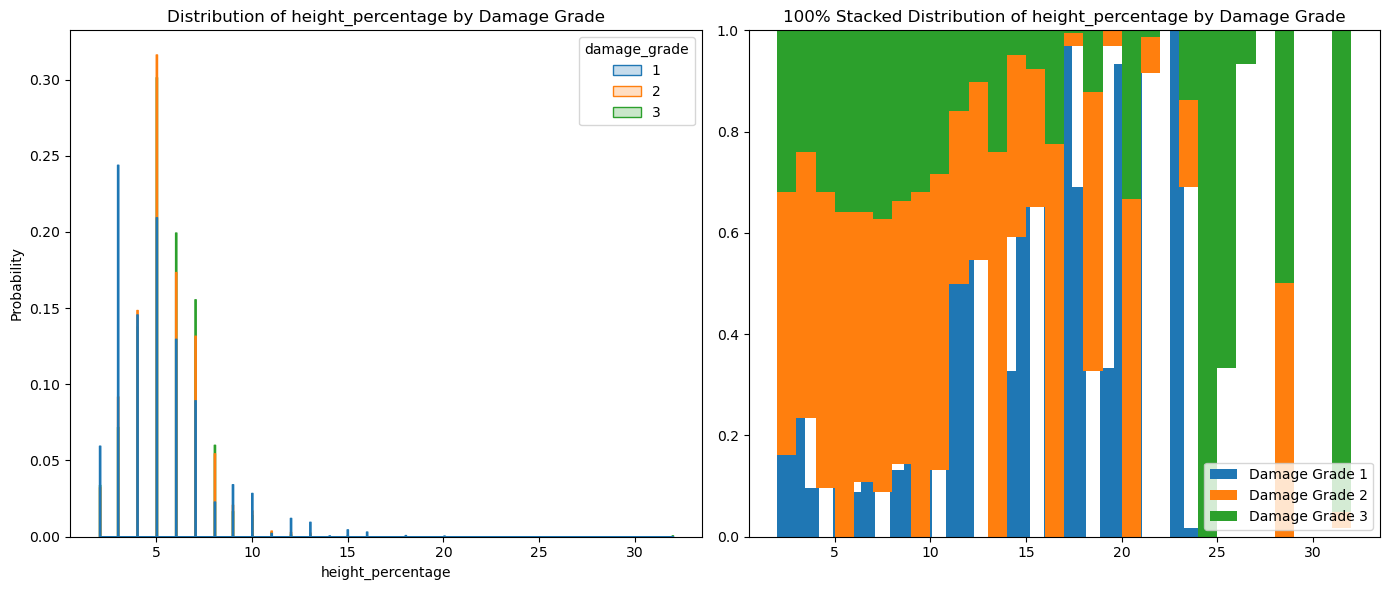

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


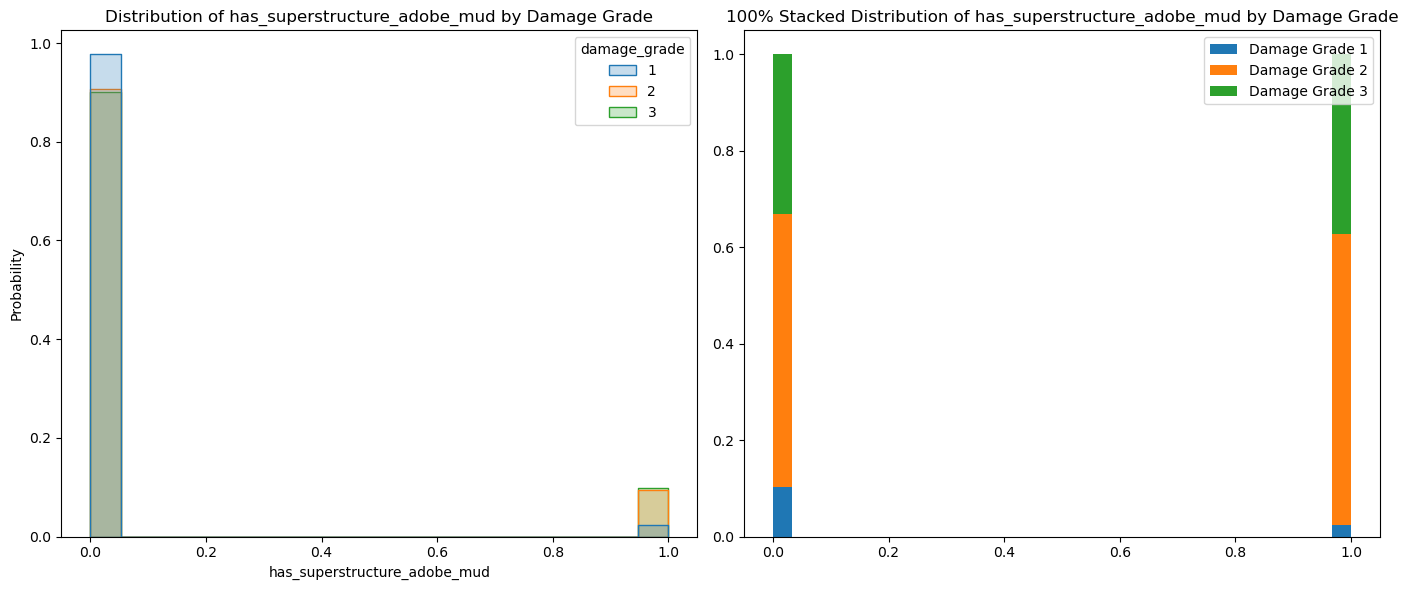

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


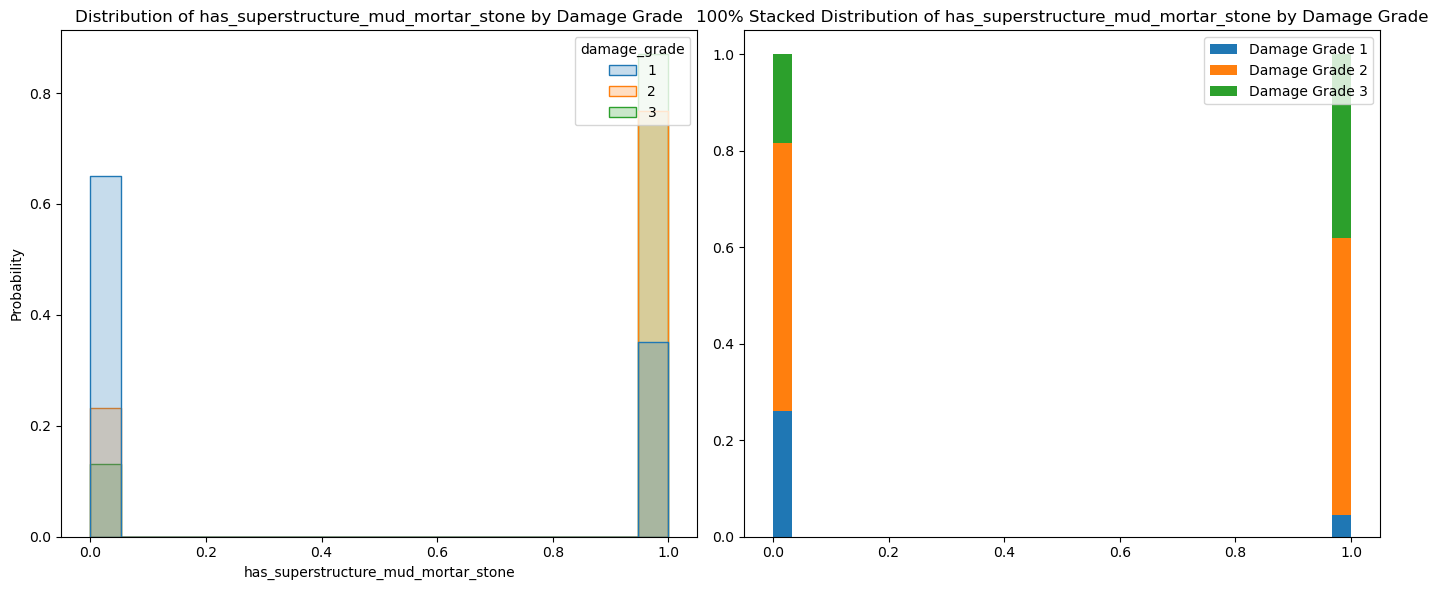

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


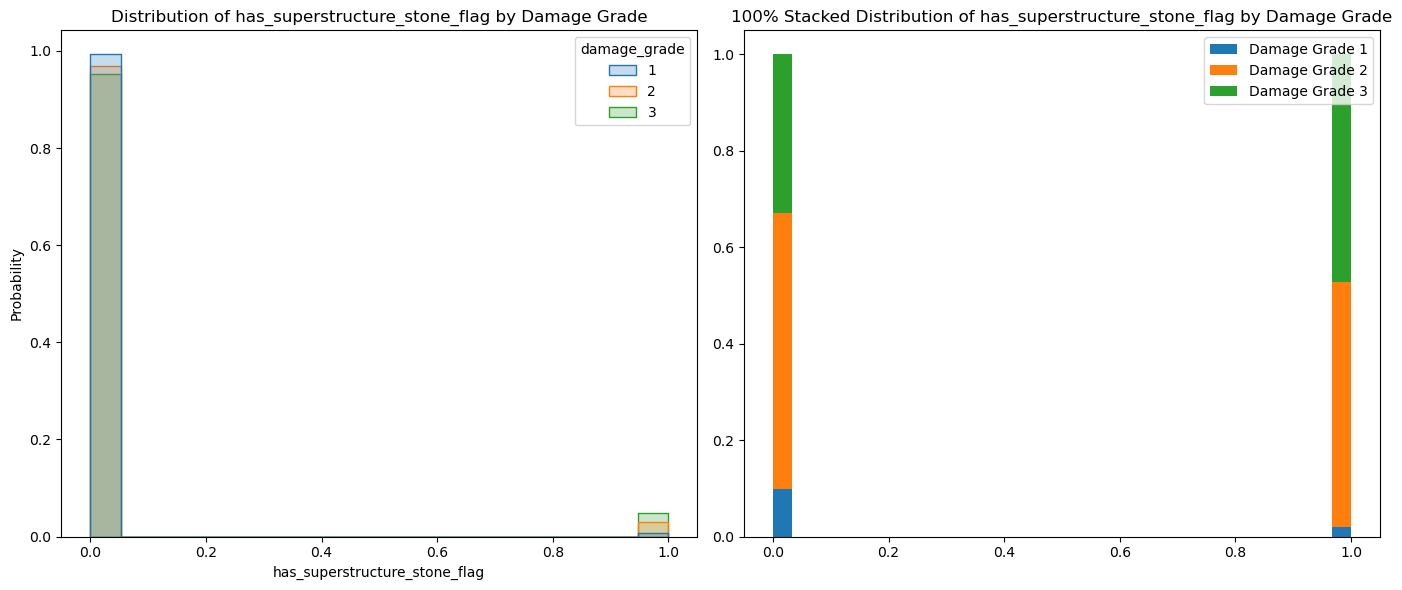

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


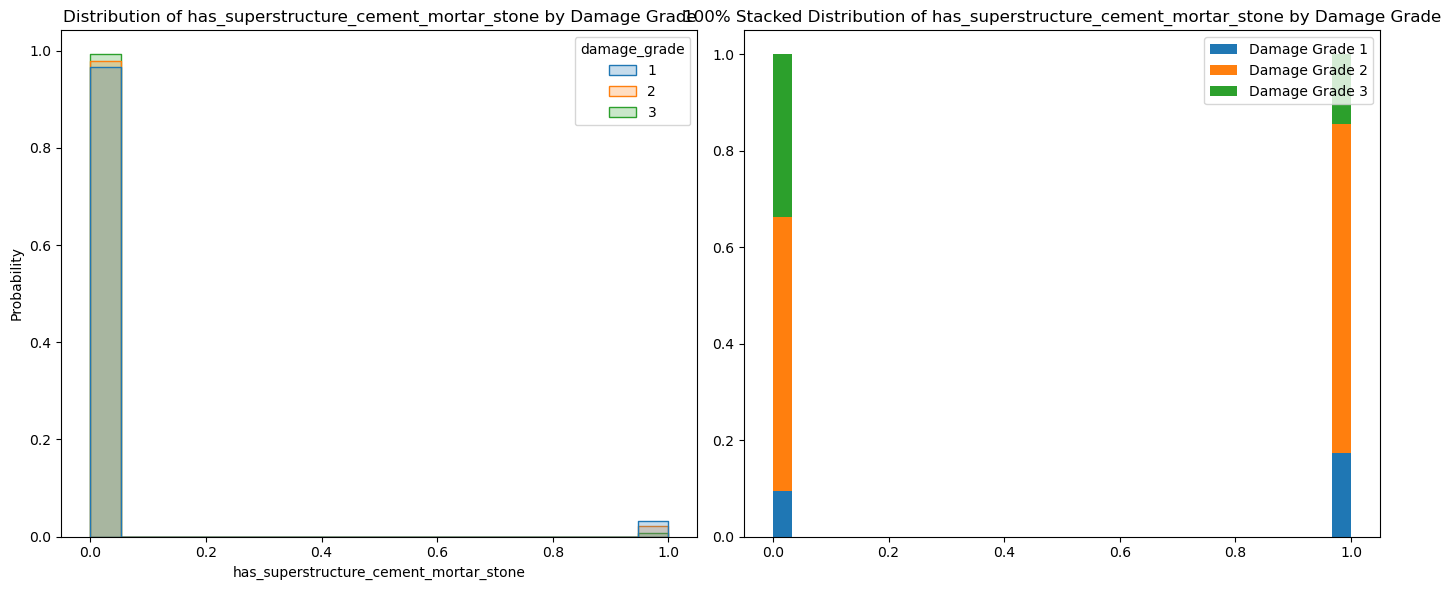

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


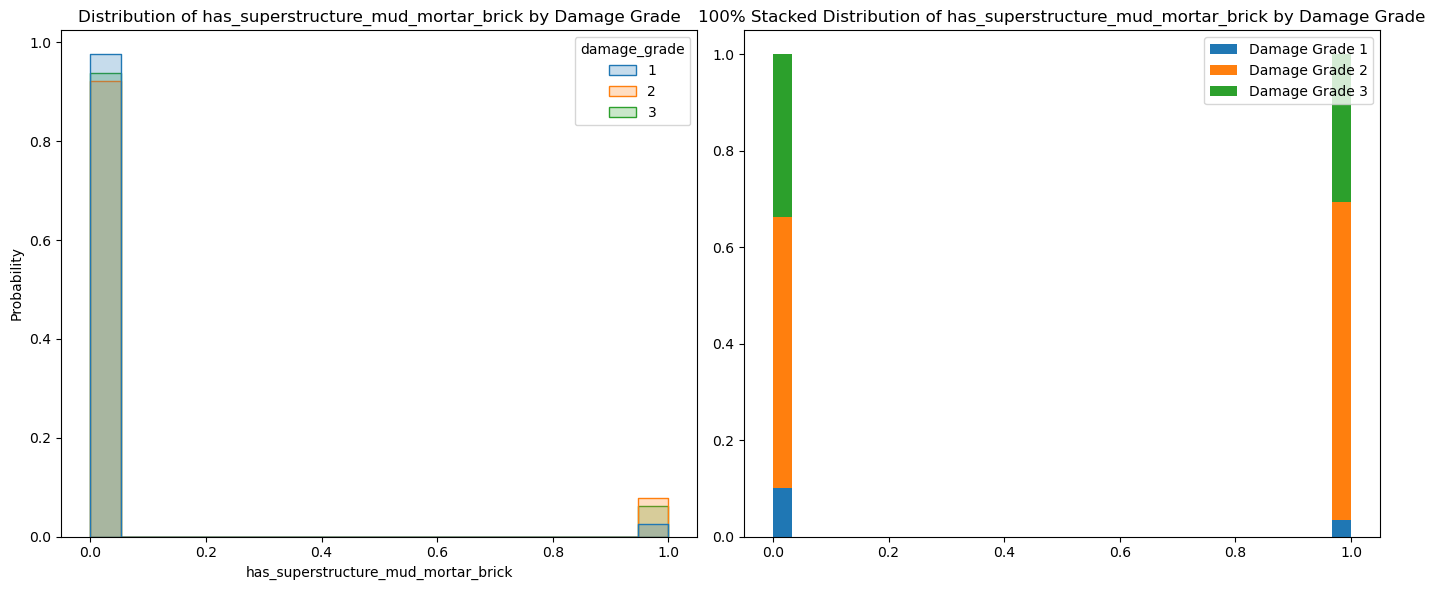

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


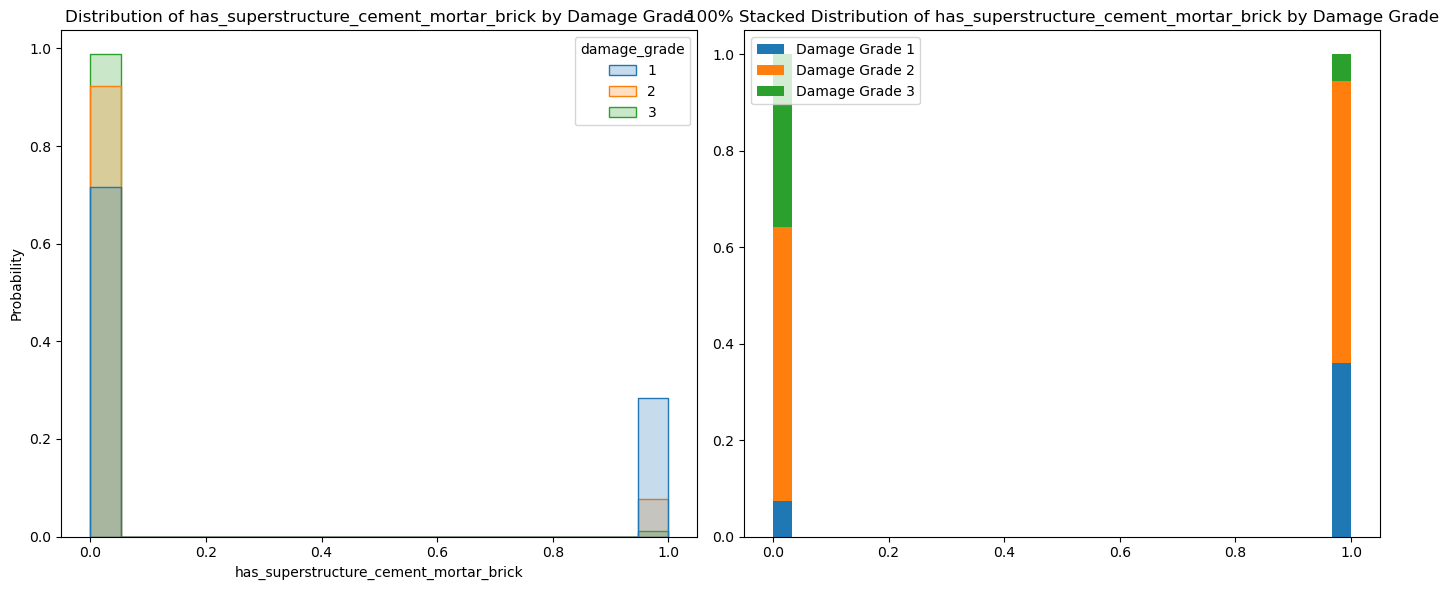

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


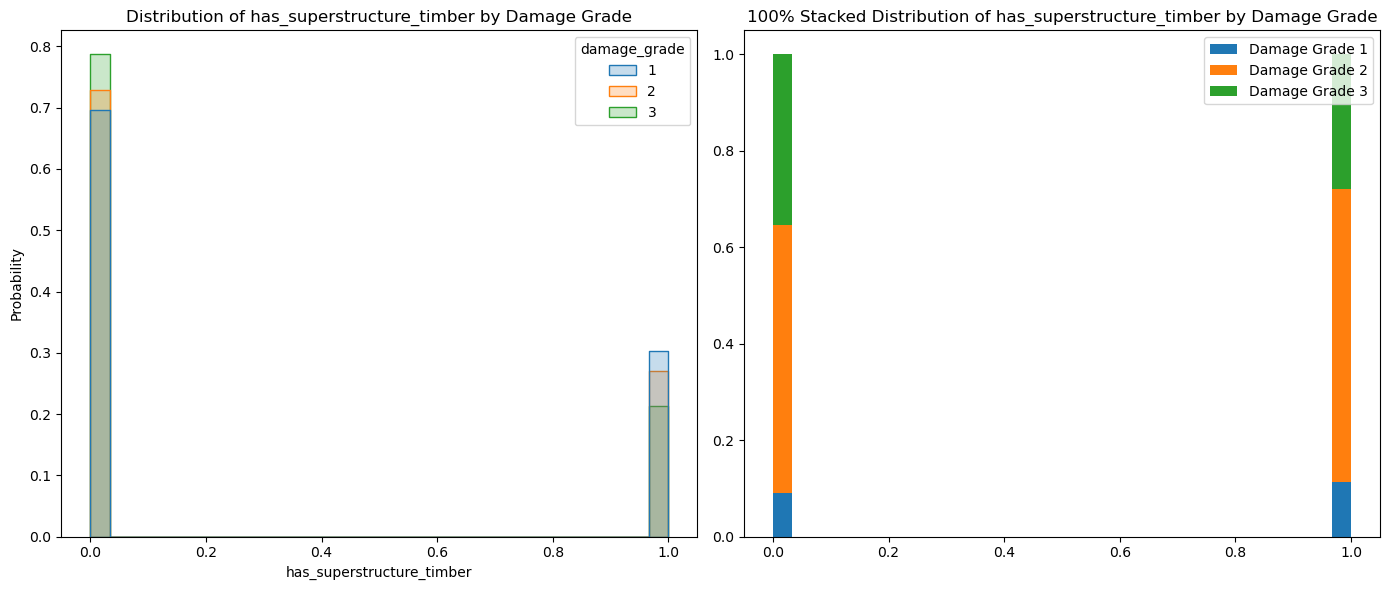

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


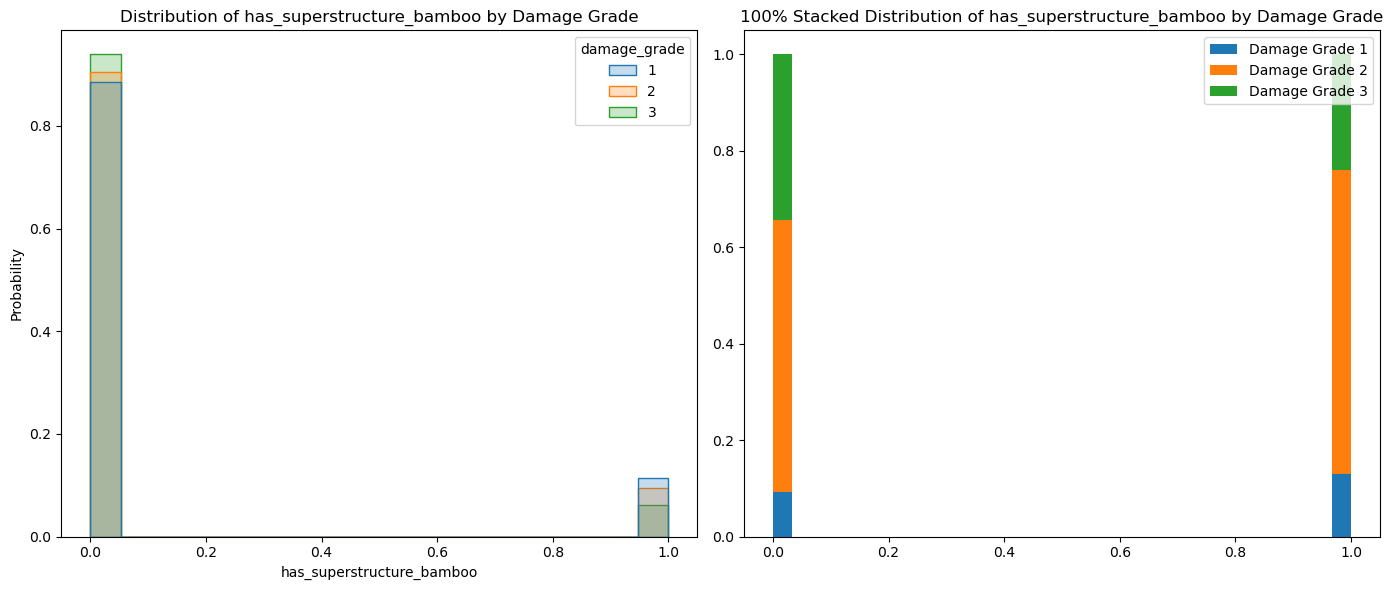

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


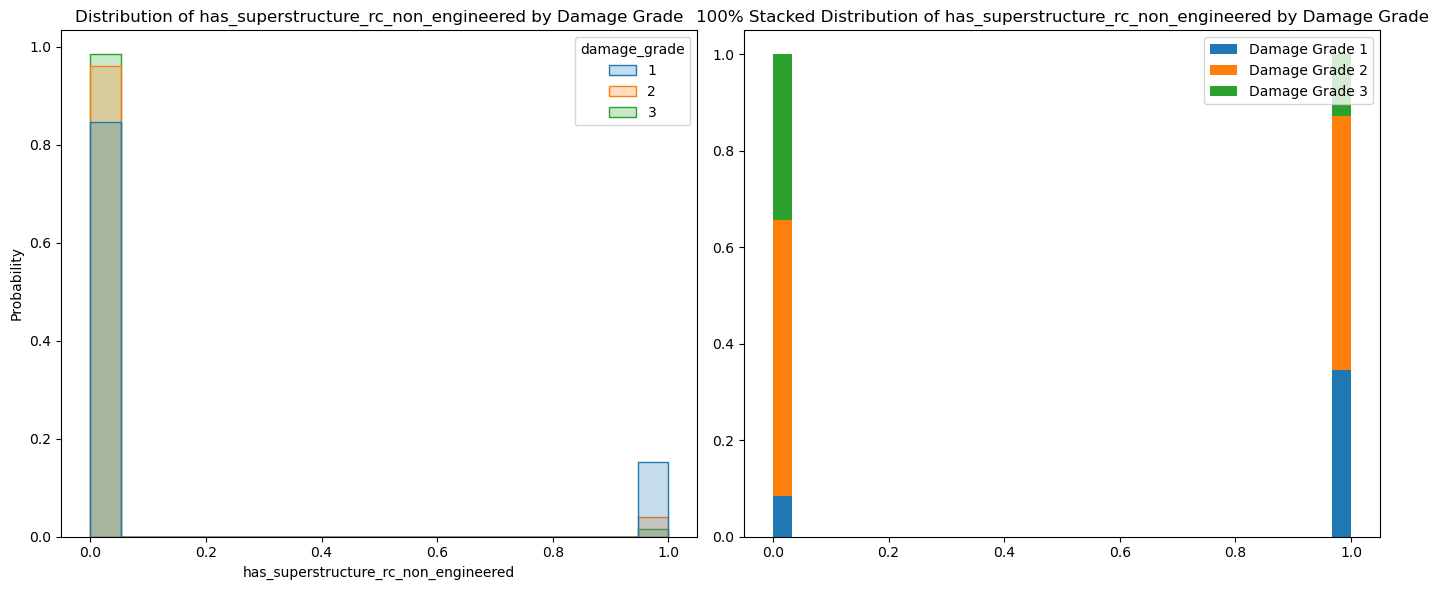

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


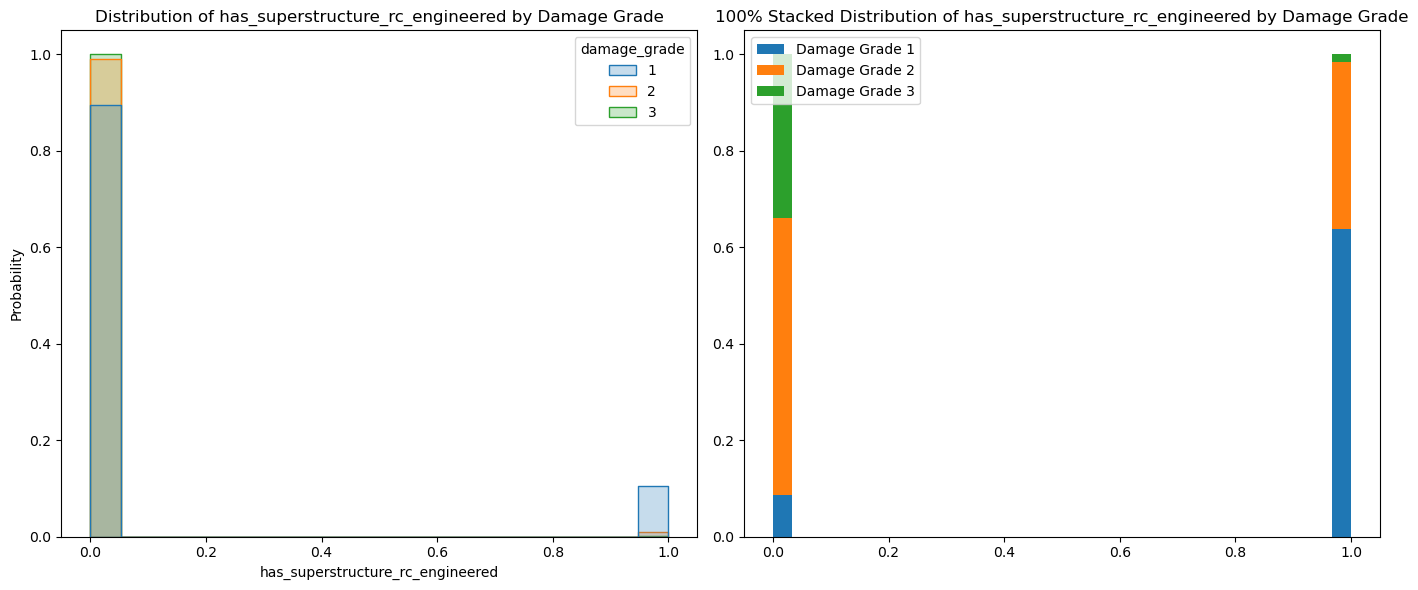

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


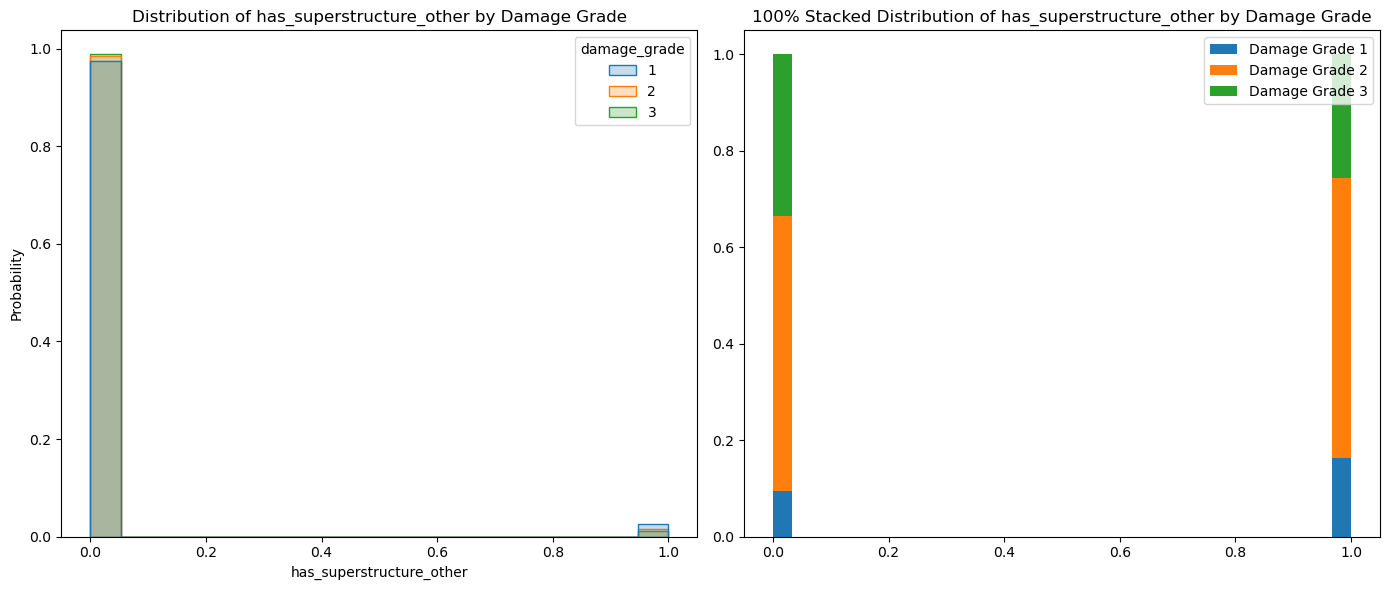

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


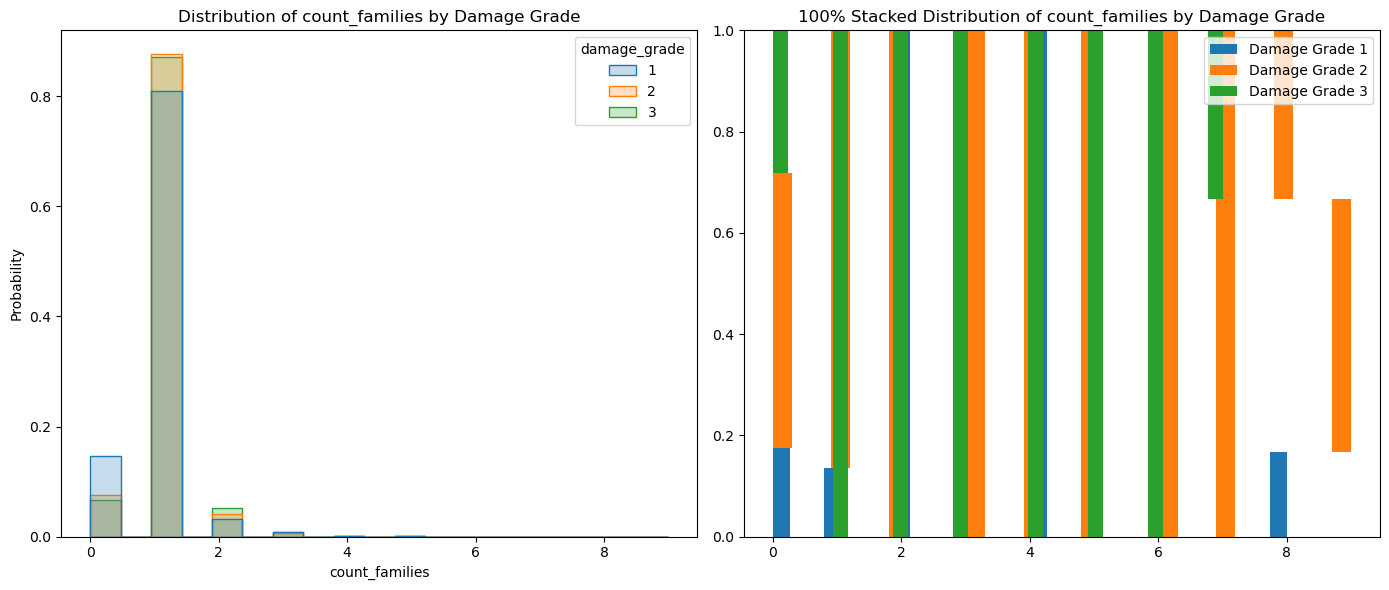

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


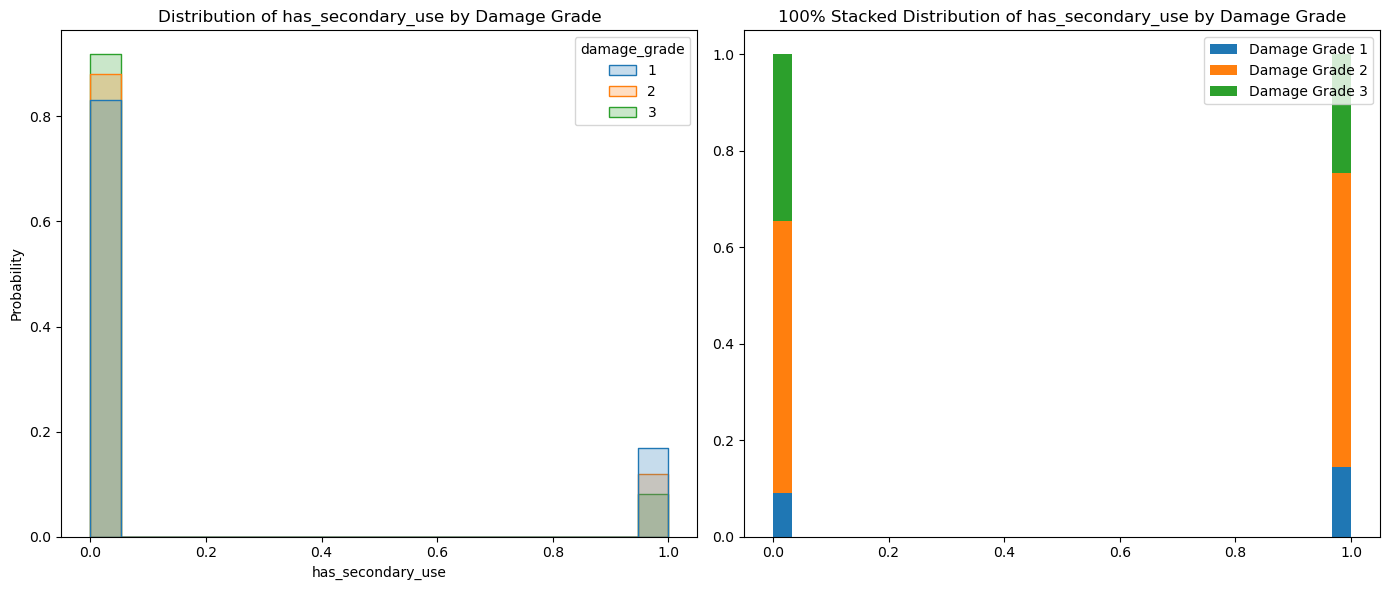

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


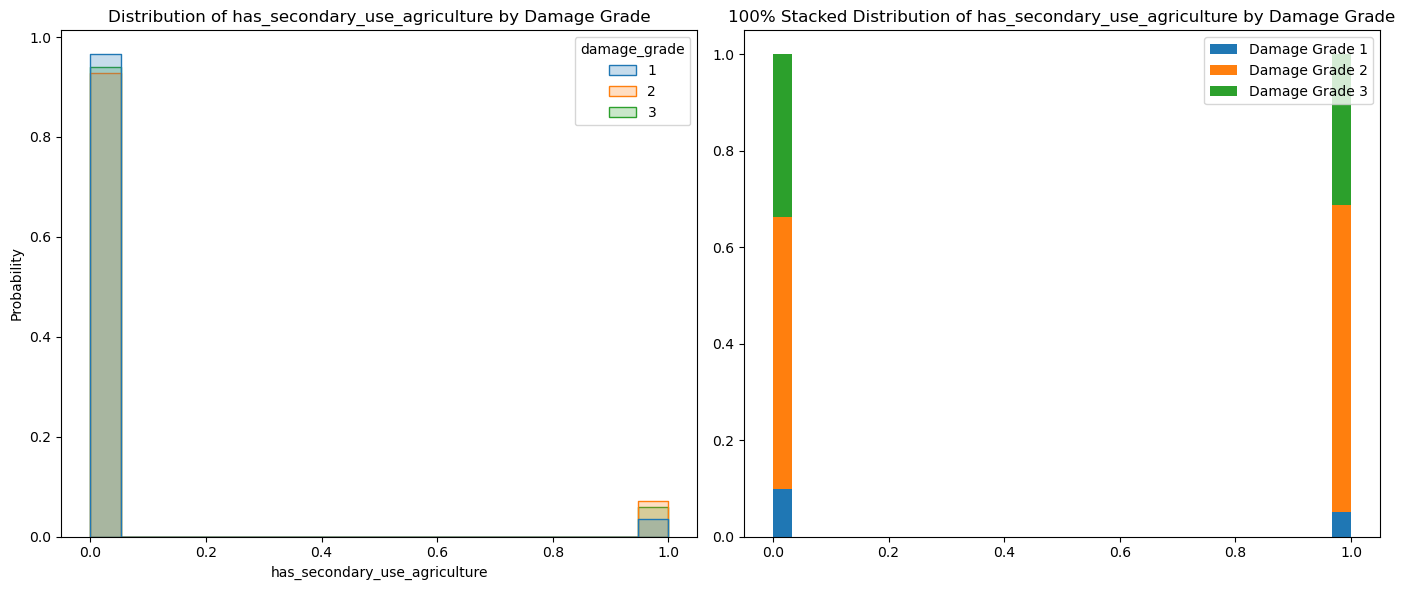

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


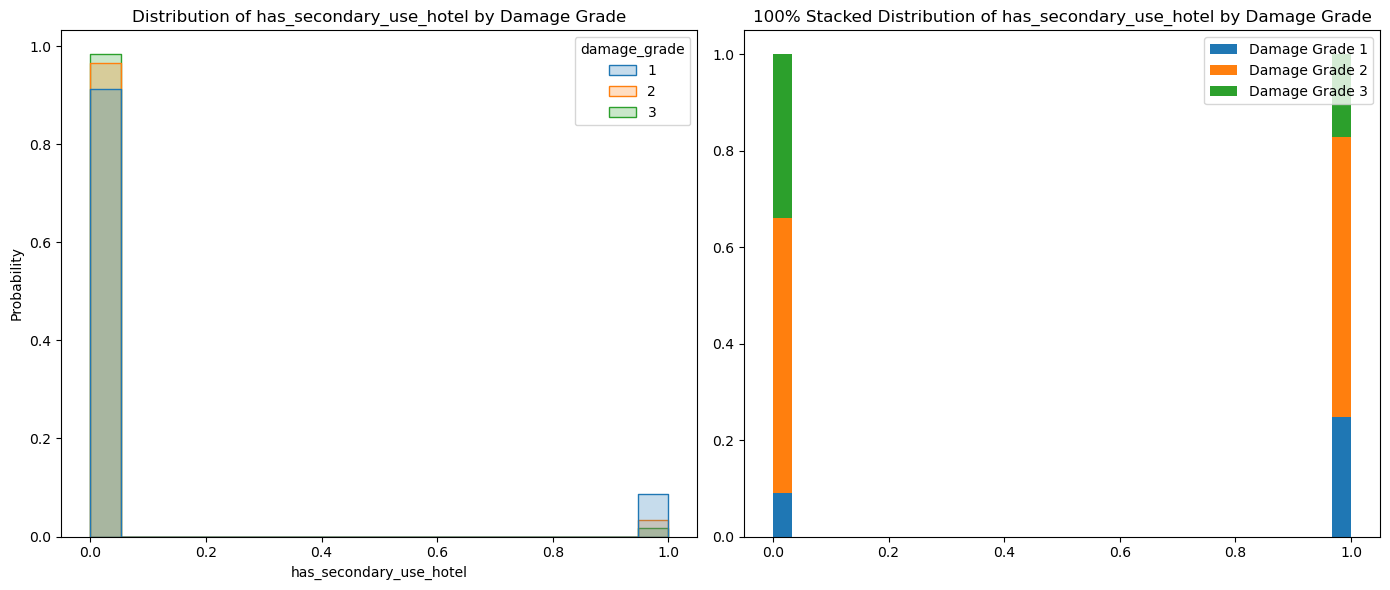

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


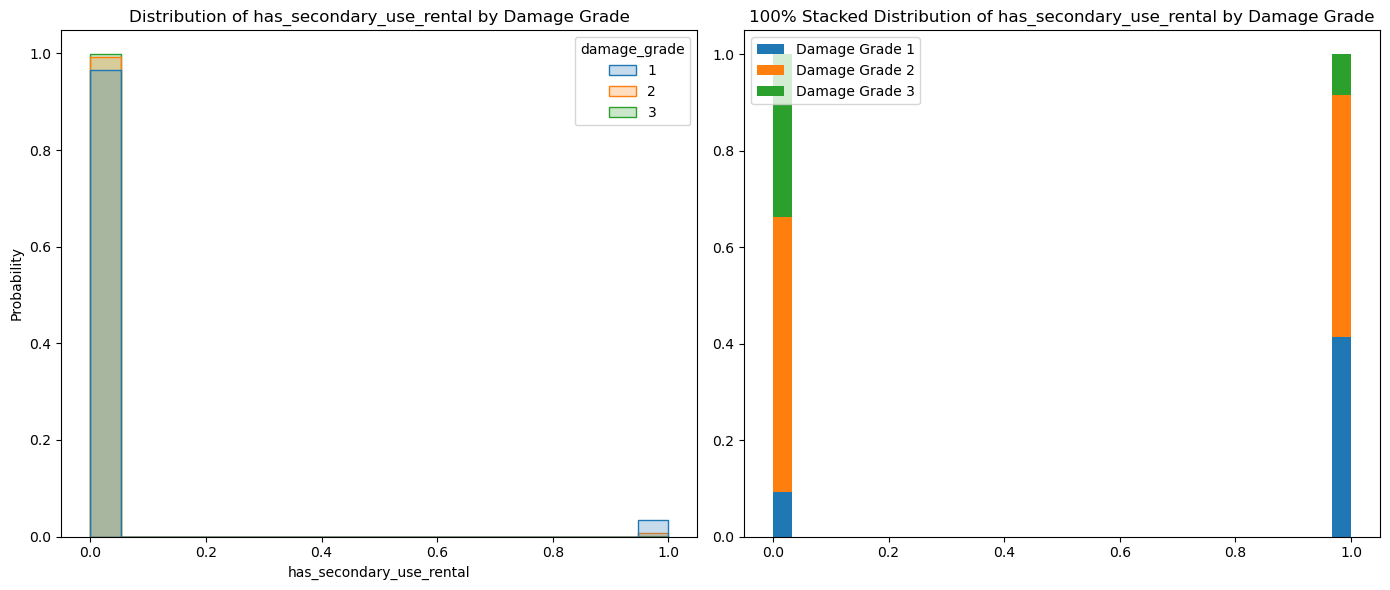

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


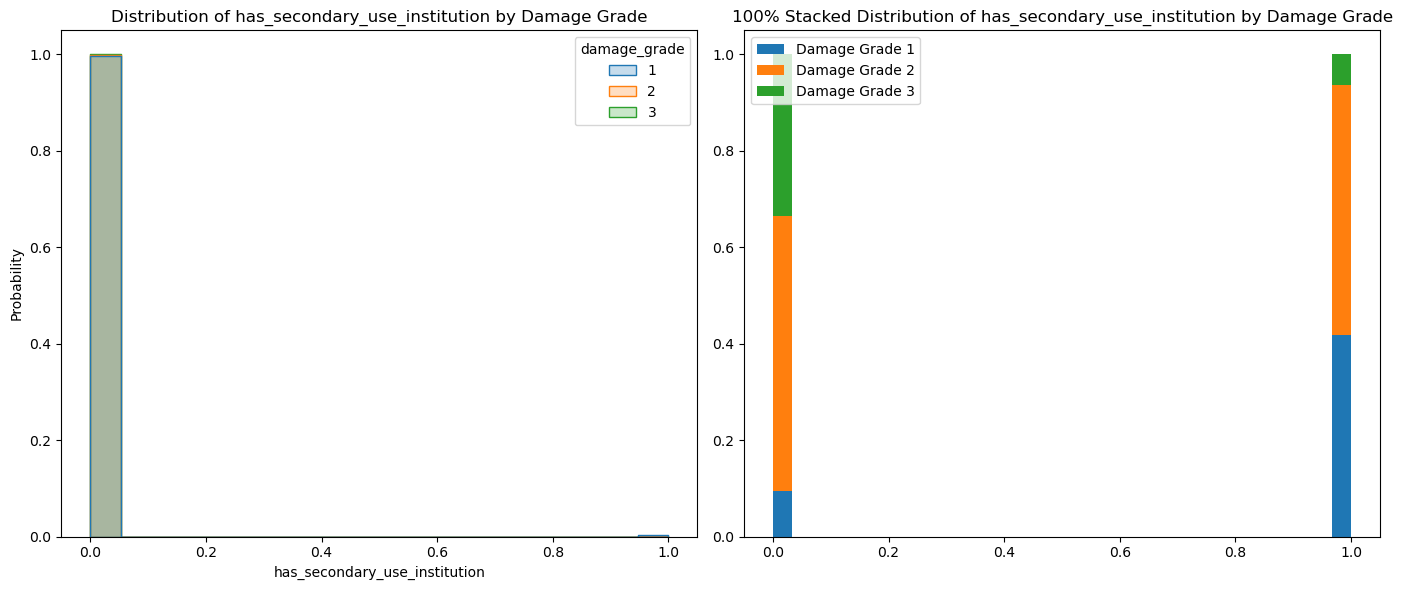

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


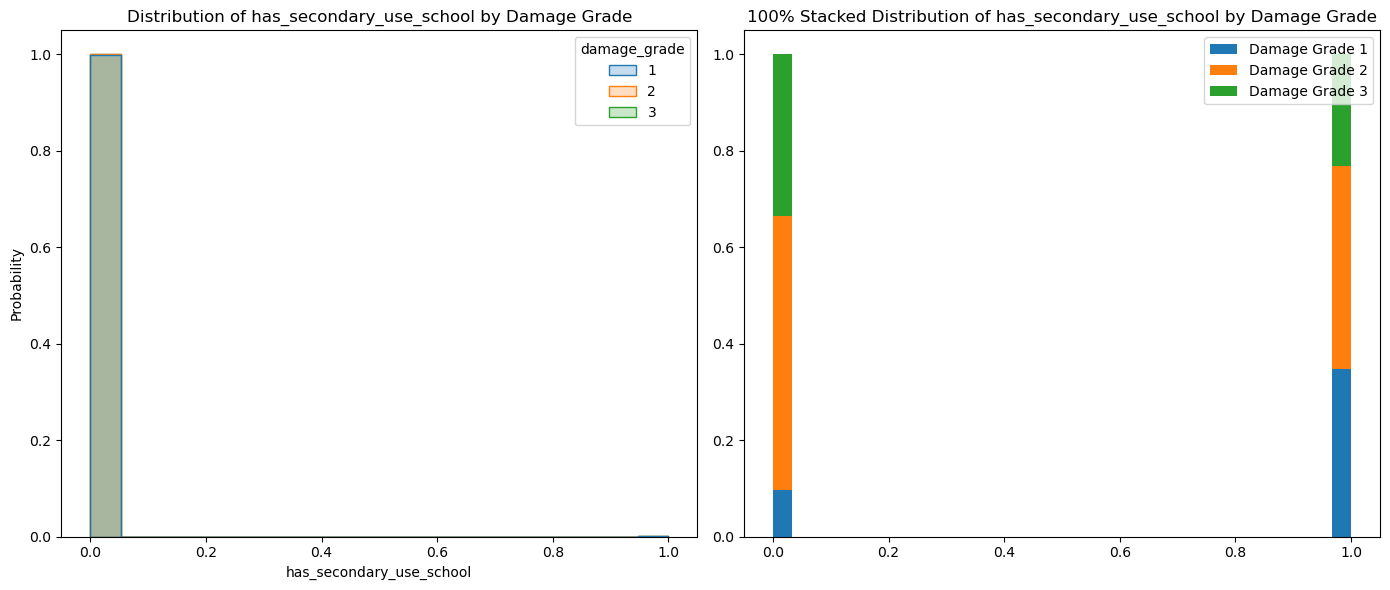

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


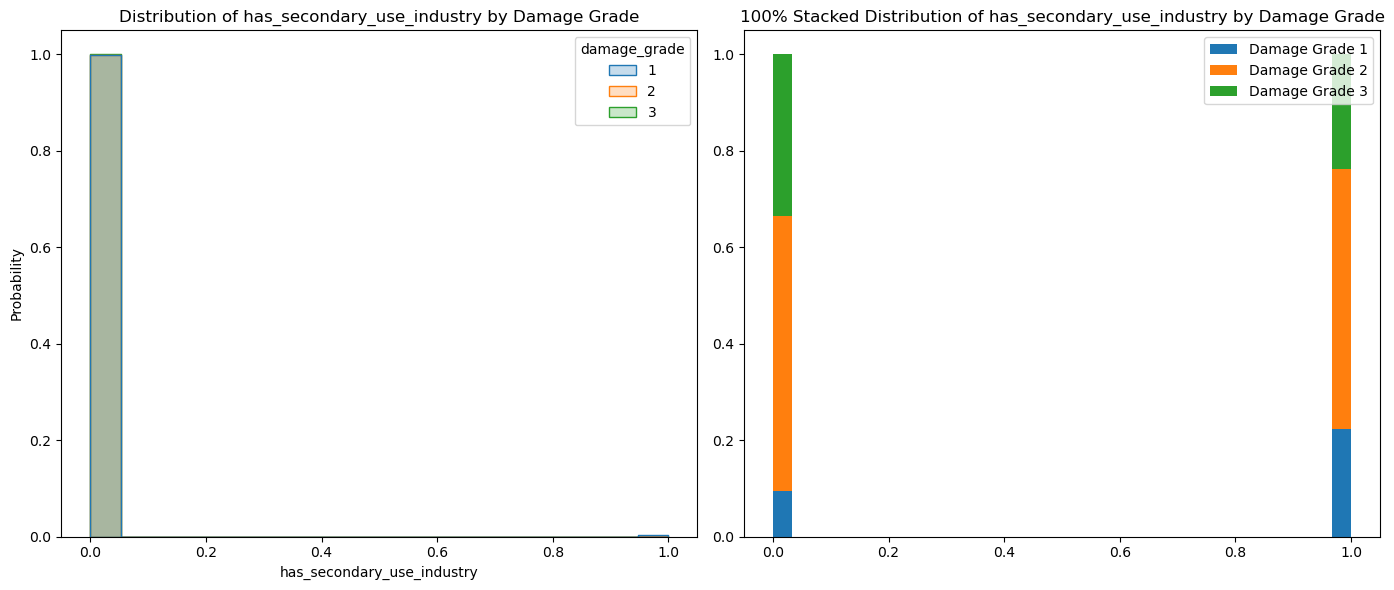

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


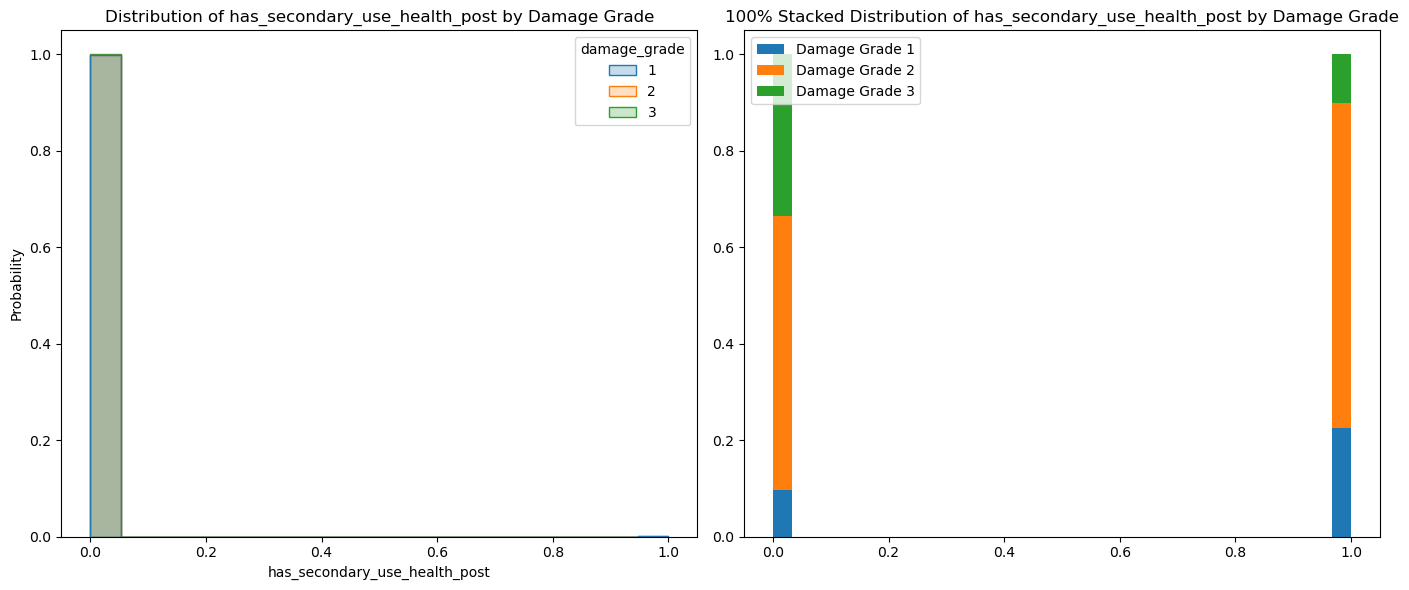

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


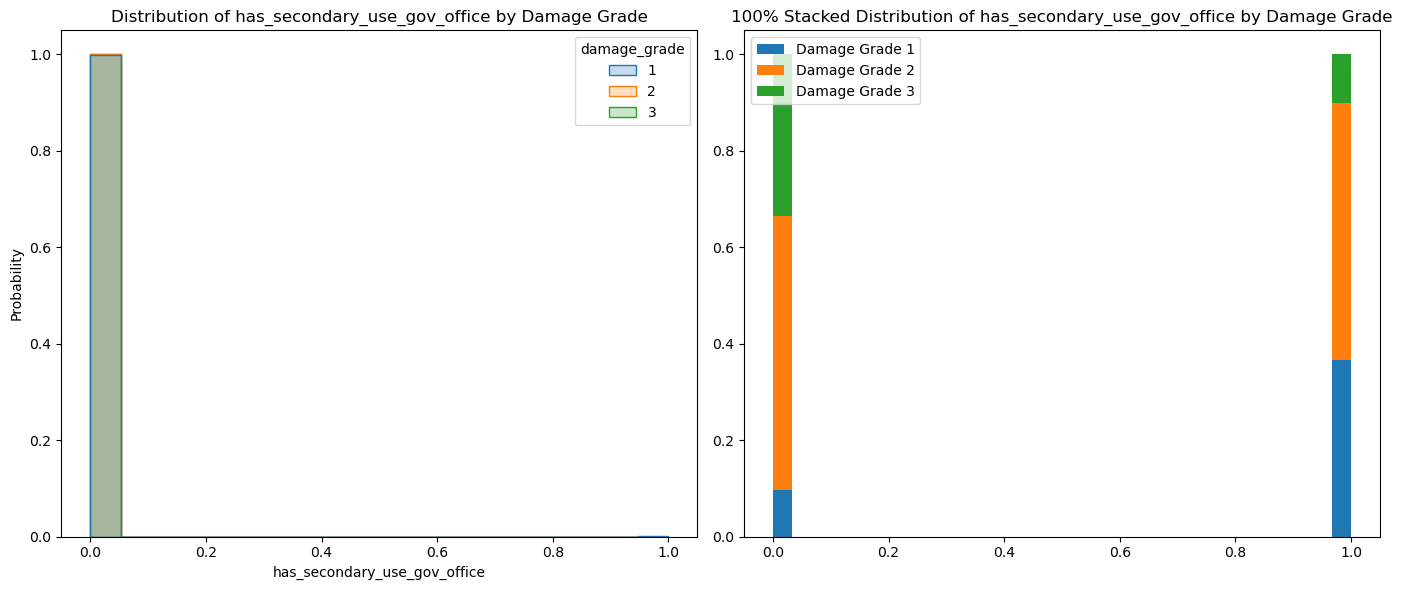

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


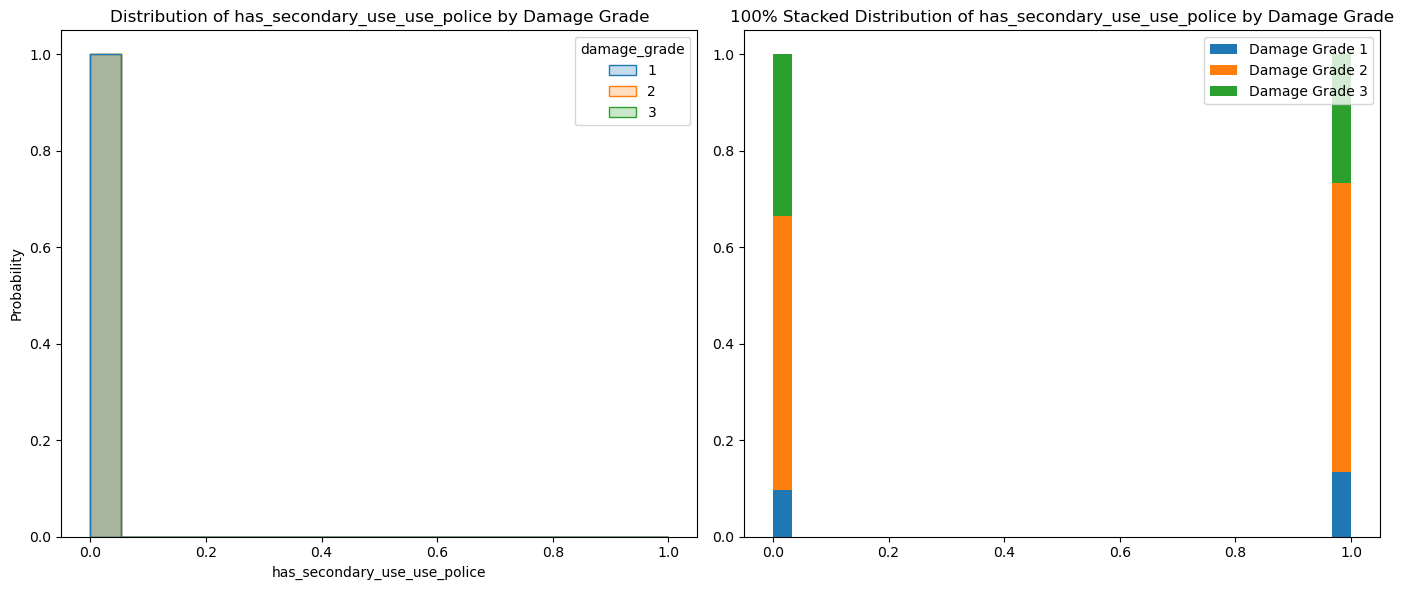

/home/petr/git/minicomp-2/helper_functions_petr.py:71: RuntimeWarning: invalid value encountered in divide
  heights = histogram[0] / total_height


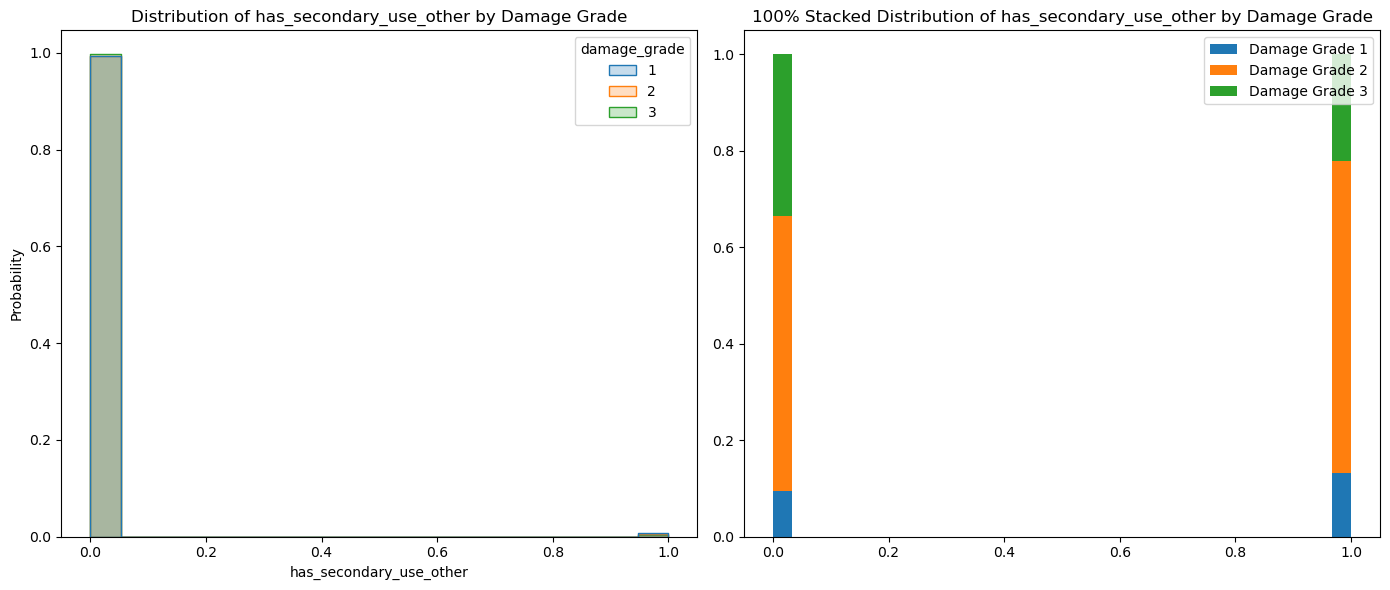

In [11]:
# for each predictor, show histogram and 100% stacked histogram  
helper_functions_petr.histograms_f(X_train,y_train,cols_ignore=('building_id'))

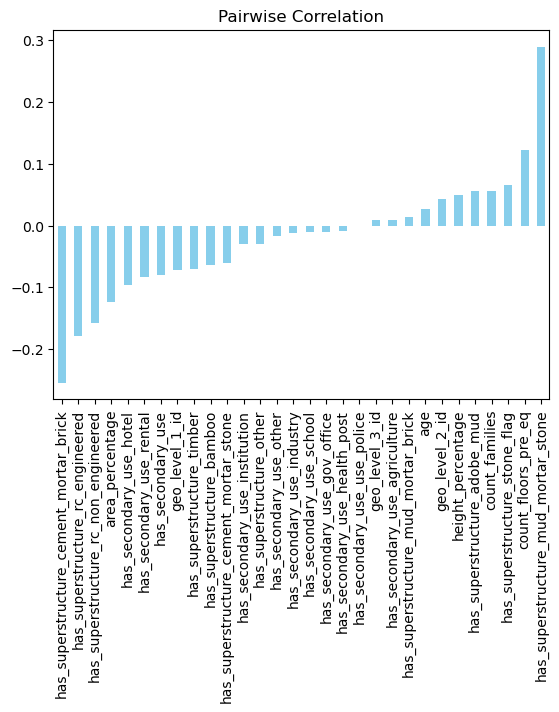

In [20]:
# pairwise correlation
# Concatenate X_train and y for correlation calculation
data = pd.concat([X_train, y], axis=1)

# Calculate correlation matrix
correlations = data.select_dtypes(include=[np.number]).drop('building_id', axis=1).corr()[y.name].drop(y.name)
correlations=correlations.sort_values()
# Plot bar chart
correlations.plot(kind='bar', color='skyblue')

plt.title('Pairwise Correlation')
plt.show()

Generation of Random Forest and optimization

In [ ]:
#FOR NOW (to test tree gen) limit dataset to a few parameters only
mask = ['has_superstructure_adobe_mud', 'age','count_floors_pre_eq','area_percentage','height_percentage','has_secondary_use',
        'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo'] 


# apply mask
X = X[mask]

X_train = X_train[mask]
X_valid = X_valid[mask]

# Cut off 'building_id' from X_test!
X_test_pred = X_test[mask]

In [ ]:
# Initiate model
model = lgb_optimized_petr.LGBM(X_train, X_valid, y_train, y_valid)

In [ ]:
# Generate and optimize Random Forest, feed with test data to create prediction
model.optimization(X=X, y=y,optuna_n_trials=2) # run model fit and optimize hyperparameters


In [ ]:
# create and save predictions 
y_pred=model.predict_f(X_test_pred)

In [ ]:
# summary statistics of predicted values
(y_pred.mean(),y_pred.std())

Evaluation

In [ ]:
# feature importance default plot
fitted_model=model.get_model()
lgb.plot_importance(fitted_model)

# describe which importance measure it is -- perhaps add as argument to function

In [ ]:
# feature importance sns plot
feature_imp_df=model.feature_importance_table()
feature_imp_df


In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_df)
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

Export

In [ ]:
# Export prediction to creat csv by DrivenData.org datastandards
helper_functions.write_output(X_test, y_pred)